In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
import subprocess
import uuid

In [2]:
exe_dir = "../code" # directory where the executable is found
output_dir = "../code/data" # directory to save the data file
#data_dir = "/code/data" # directory for jupyter to find the data in

In [3]:
# Call generate source with given parameters
# Have some default values
def generate_source(
    outputFile=None, 
    sigma=0.0, 
    delta_T=None, 
    N=100000,
    f=0, 
    phi=0, 
    A=0, 
    r=0
):
    """
    Usage: ./generate_source  [-h] [-o <file>] [-s <float>] [-d <float>] [-N <int>] [-f <float>] [-p <float>] [-a <float>] [-r <int>]
      -o, --output=<file>       output file
      -s, --sigma=<float>       standard deviation sigma
      -d, --deltaT=<float>      delta T betwean measurements
      -N, --length=<int>        number of elements
      -f, --freq=<float>        frequency
      -p, --phase=<float>       phase
      -a, --amplitude=<float>   signal amplitude
      -r, --random=<int>        if set to 1, generate random signal
      -h, --help                print this help and exit
    """
    if delta_T == None : 
        delta_T = 1/N
    if outputFile == None:
        outputFile = "data_" + str(uuid.uuid4()) + ".csv"
    
    outputPath = os.path.join(output_dir, outputFile) # output_dir + "/" + "myfilename.csv"
    exe_path = os.path.join(exe_dir, 'generate_source')
    cmd_str = f"{exe_path} -o {outputPath} -s {sigma} "\
        f"-d {delta_T} -N {N} -f {f} -p {phi} -a {A} -r {r}"
    
    # Optionally print the command line and test it outside the notebook
    print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())

    return os.path.join(output_dir, outputFile)



def prober(inputFile, f=0, outputFile=None, phi=0, templateFile=None, mod=0):
    """
    Usage: ./prober  [-h] [-i <file>] [-o <file>] [-f <float>] [-p <float>] [-t <file>] [-m <int>]
      -i, --input=<file>        input file
      -o, --output=<file>       output file
      -f, --freq=<float>        frequency
      -p, --phase=<float>       phase
      -h, --help                print this help and exit
      -t, --templatebank=<file> template bank file
      -m, --method=<int>        select method to analyze signal 1, 2 or 3
    """
    
    if outputFile == None:
        outputFile = "results_" + str(uuid.uuid4()) + ".csv"
    
    import os
    exe_path = os.path.join(exe_dir, 'prober')
    #exepath = "/home/code/datalab/prober"
    #exepath = "/home/code/datalab/" + "prober"
    #exepath = "data/data_01.csv"
    
    """
    prober -i data/data_01.csv -o data/results_01.csv -t template.txt -m 1
    """
    cmd_str = f"{exe_path} -i {output_dir}/{inputFile} "\
        f"-o {output_dir}/{outputFile} -m {mod}"
    
    if templateFile:
        cmd_str += f" -t {output_dir}/{templateFile} "
    else:
        cmd_str += f" -f {f} -p {phi}"
    
    # Optionally print the command line and test it outside the notebook
    #print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())
    if os.path.isfile(outputFile):
        print(f"Output generated in file {outputFile}")

    return os.path.join(output_dir, outputFile)


In [4]:
A = 1
N = 100

f0, f1, f2 =  10, 20, 25
phi0, phi1, phi2 = 0,0,0
sigma0, sigma1, sigma2 = 0, A*0.1, A*0.4
source = {'S0':{'name':'s0.txt', 'frequency':f0, 'phase':0, 'noise':A*0.01},
           'S1':{'name':'s1.txt', 'frequency':f0, 'phase':0, 'noise':A*0.5},
           'S2':{'name':'s2.txt', 'frequency':f0, 'phase':0, 'noise':A*1.5}}

generate_source(outputFile=source['S0']['name'],sigma=source['S0']['noise'],
                         delta_T=1/(32*source['S0']['frequency']),f=source['S0']['frequency'],
                         phi=source['S0']['phase'],N=N,  A=A, r=0)
generate_source(outputFile=source['S1']['name'],sigma=source['S1']['noise'],
                         delta_T=1/(32*source['S1']['frequency']),f=source['S1']['frequency'],
                         phi=source['S1']['phase'],N=N,  A=A, r=0)
generate_source(outputFile=source['S2']['name'],sigma=source['S2']['noise'],
                         delta_T=1/(32*source['S2']['frequency']),f=source['S2']['frequency'],
                         phi=source['S2']['phase'],N=N,  A=A, r=0)

../code/generate_source -o ../code/data/s0.txt -s 0.01 -d 0.003125 -N 100 -f 10 -p 0 -a 1 -r 0
../code/generate_source -o ../code/data/s1.txt -s 0.5 -d 0.003125 -N 100 -f 10 -p 0 -a 1 -r 0
../code/generate_source -o ../code/data/s2.txt -s 1.5 -d 0.003125 -N 100 -f 10 -p 0 -a 1 -r 0


'../code/data/s2.txt'

In [5]:
t0, s0 = np.loadtxt('../code/data/s0.txt').T
t1, s1 = np.loadtxt('../code/data/s1.txt').T
t2, s2 = np.loadtxt('../code/data/s2.txt').T

Text(0.5, 1.0, 'sigma=1.5')

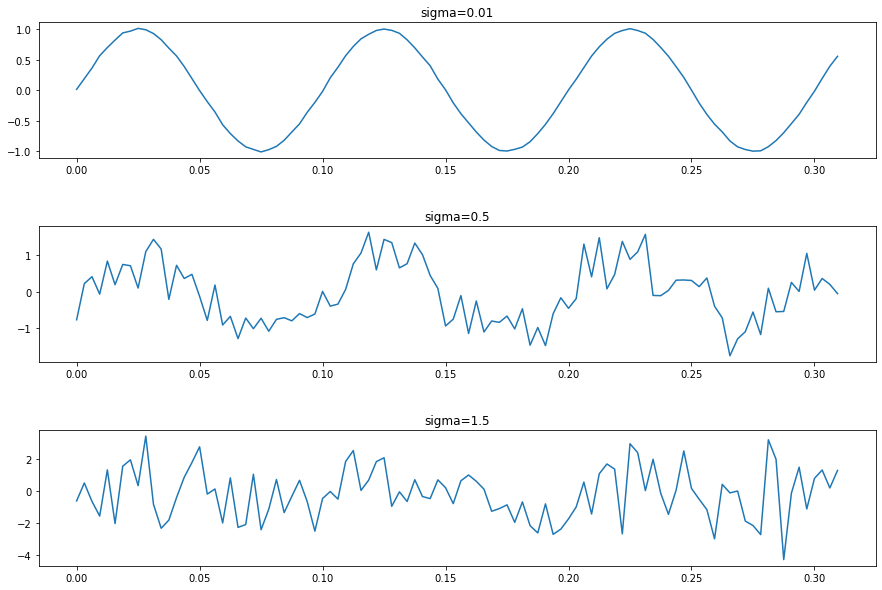

In [6]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.5)
ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

ax0.plot(t0,s0)
ax0.set_title('sigma='+str(source['S0']['noise']))

ax1.plot(t1,s1)
ax1.set_title('sigma='+str(source['S1']['noise']))

ax2.plot(t2,s2)
ax2.set_title('sigma='+str(source['S2']['noise']))


# S0

In [7]:
prober("s0.txt", f=10, mod=1)
prober("s0.txt", f=10, mod=2)
prober("s0.txt", outputFile='prob0.txt', f=10, mod=3)

The process has an output: 10 0 0.484995

The process has an output: 10 0 0.000104946



'../code/data/prob0.txt'

# Task 3
Learn how prober results change, varying the parameters of an injected signal while probing the same parameter point.


In [8]:
for i in range(len(list(source.keys()))):
    print(f'signal{i}')
    prober(f"s{i}.txt", f=10, mod=1)

signal0
The process has an output: 10 0 0.484995

signal1
The process has an output: 10 0 0.456696

signal2
The process has an output: 10 0 0.402025



In [9]:
for i in range(len(list(source.keys()))):
    print(f'signal{i}')
    prober(f"s{i}.txt", f=10, mod=2)

signal0
The process has an output: 10 0 0.000104946

signal1
The process has an output: 10 0 0.226927

signal2
The process has an output: 10 0 2.18418



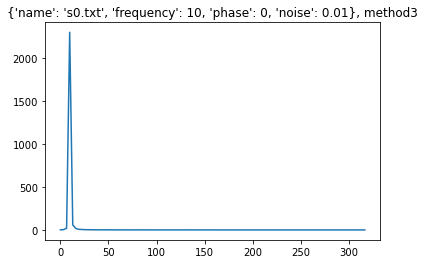

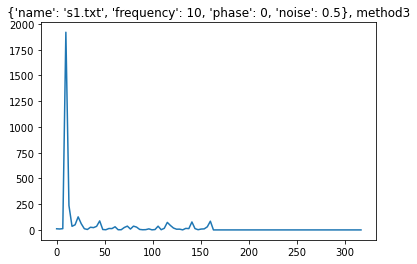

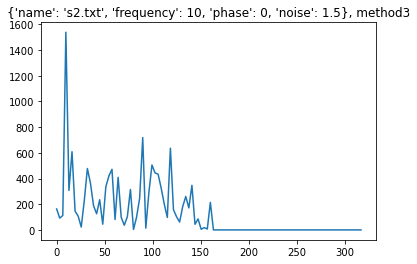

In [10]:
L = list(source.keys())
for i in range(len(L)):
    prober(f"s{i}.txt", outputFile=f'prob{i}.txt', f=10, mod=3)
    t, s = np.loadtxt(f'../code/data/prob{i}.txt')[:,0], np.loadtxt(f'../code/data/prob{i}.txt')[:,2]
    plt.figure()
    plt.title(f'{source[L[i]]}, method3')
    plt.plot(t,s, )

# Use a template bank to probe a wider region of parameter space

In [11]:
import itertools
f = np.linspace(0, 5000, 20)
phi = [0.0]

with open('../code/data/tbank.txt', 'w') as out:
    for F, PHI in itertools.product(f, phi):
        out.write(f'{F} {PHI}\n')

print(np.loadtxt('../code/data/tbank.txt'))

[[   0.            0.        ]
 [ 263.15789474    0.        ]
 [ 526.31578947    0.        ]
 [ 789.47368421    0.        ]
 [1052.63157895    0.        ]
 [1315.78947368    0.        ]
 [1578.94736842    0.        ]
 [1842.10526316    0.        ]
 [2105.26315789    0.        ]
 [2368.42105263    0.        ]
 [2631.57894737    0.        ]
 [2894.73684211    0.        ]
 [3157.89473684    0.        ]
 [3421.05263158    0.        ]
 [3684.21052632    0.        ]
 [3947.36842105    0.        ]
 [4210.52631579    0.        ]
 [4473.68421053    0.        ]
 [4736.84210526    0.        ]
 [5000.            0.        ]]


In [12]:
import itertools

freq = 10
def plot_freq_sol(datafile, N_df=300, f_max=100, mod=1, ph=0, title=None):
    
    f = np.linspace(0, f_max, N_df)
    phi = [ph]
    
    tbank = 'tbank.txt'

    with open('../code/data/'+tbank, 'w') as out:
        for F, PHI in itertools.product(f, phi):
            out.write(f'{F} {PHI}\n')

    results_file = prober(datafile, templateFile=tbank, mod=mod)   

    results = np.loadtxt(results_file)

    # Plotting
    plt.figure(figsize=(15,4))
    if not title:
        title = f"{datafile}, method{mod} vs frequency"
        
    plt.title(title, fontsize=18)

    plt.plot(results[:,0],results[:,2])
    
    plt.xlim([0.01,f_max])
    plt.xscale('log')
    plt.xlabel("$f [Hz]$", fontsize=15)
    plt.ylabel("$S_{mod}(f)$", fontsize=15)
    
    plt.show()
    plt.close()

    # S_2 searching for a minimum:
    if mod == 2:
        best = np.where(results[:,2] == np.min(results[:,2]))
    else:
        best = np.where(results[:,2] == np.max(results[:,2]))
    
    print("Frequency  f = {0:.3f}Hz".format(freq))
    print("Best TS at f = {0:.3f}Hz".format(results[:,0][best][0]))

    # Different output format for S_3:
    if mod == 3:
        TS = np.max(results[:,2])
    elif mod== 1:
        TS = np.max(results[2])
    elif mod ==2:
        TS = np.min(results[2])

    print("TS at right f = {0:.3f} ({0:.8f})".format(TS))
    print("Best TS   = {0:.3f} ({0:.8f})".format(results[:,2][best][0]))

    return results[:,0][best][0]



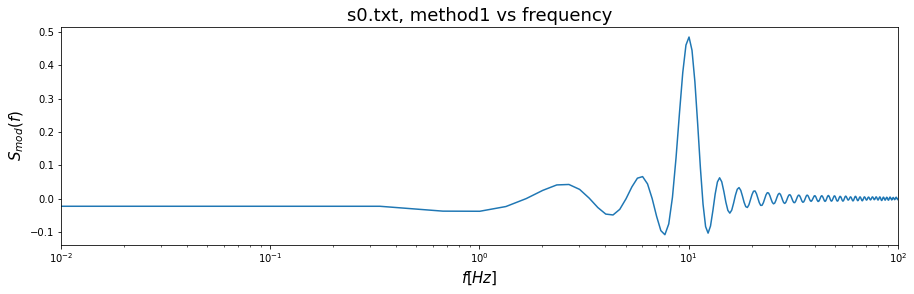

Frequency  f = 10.000Hz
Best TS at f = 10.033Hz
TS at right f = 0.669 (0.66889600)
Best TS   = 0.485 (0.48450500)


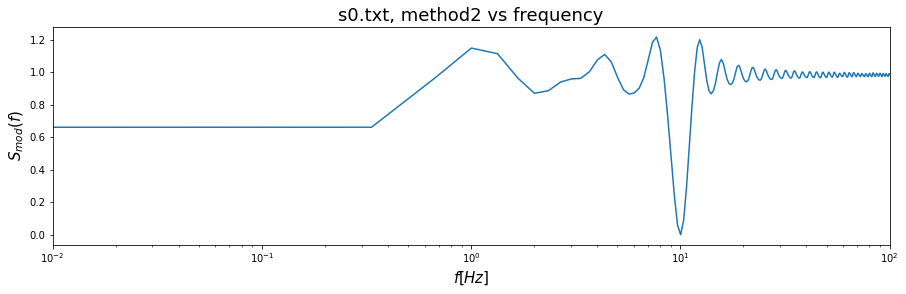

Frequency  f = 10.000Hz
Best TS at f = 10.033Hz
TS at right f = 0.000 (0.00000000)
Best TS   = 0.001 (0.00090678)


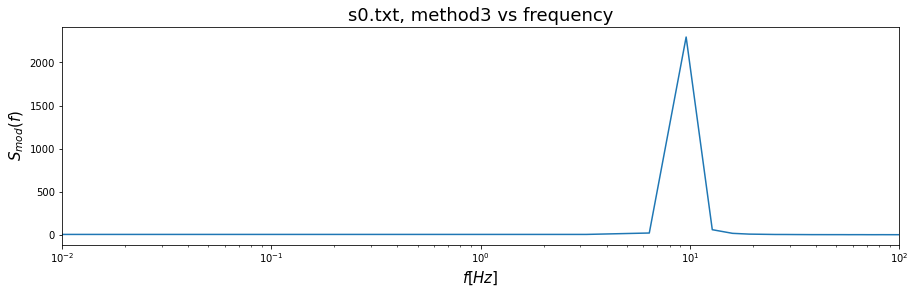

Frequency  f = 10.000Hz
Best TS at f = 9.600Hz
TS at right f = 2295.620 (2295.62000000)
Best TS   = 2295.620 (2295.62000000)


9.6

In [13]:
plot_freq_sol('s0.txt', mod=1)
plot_freq_sol('s0.txt', mod=2)
plot_freq_sol('s0.txt', mod=3)


# task 4 

## Mismatch



We can define a notion of mismatch, or squared length of a parameter offset $\delta\lambda = \lambda - \lambda_s$

$m = \delta\lambda^2$


Plot/document result findings: how large may the mismatch between injection and probed set of parameters become? What happens with weak signals (small amplitude)?

../code/generate_source -o ../code/data/data_task4_8.9_a15.txt -s 25 -d 1e-05 -N 100000 -f 8.9 -p 0 -a 15 -r 0
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------

Trail with A = 15


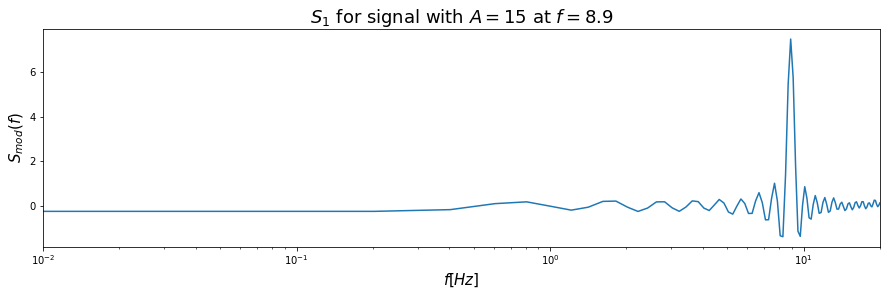

Frequency  f = 8.900Hz
Best TS at f = 8.889Hz
TS at right f = 0.404 (0.40404000)
Best TS   = 7.478 (7.47766000)
Mismatch: 0.00012343210000000882


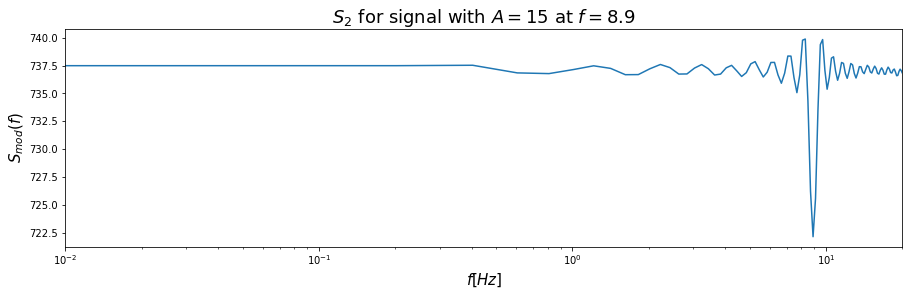

Frequency  f = 8.900Hz
Best TS at f = 8.889Hz
TS at right f = 0.000 (0.00000000)
Best TS   = 722.180 (722.18000000)
Mismatch: 0.00012343210000000882


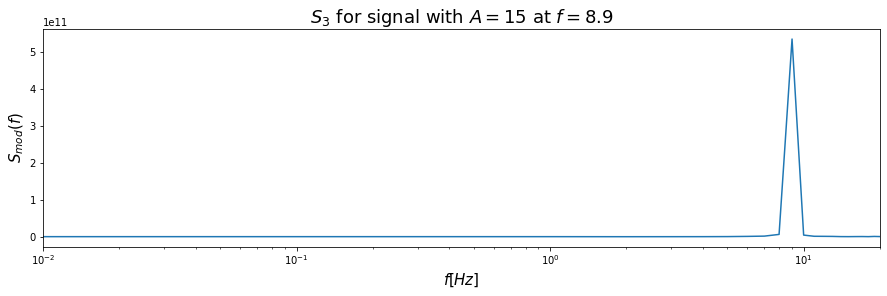

Frequency  f = 8.900Hz
Best TS at f = 9.000Hz
TS at right f = 535795000000.000 (535795000000.00000000)
Best TS   = 535795000000.000 (535795000000.00000000)
Mismatch: 0.009999999999999929
../code/generate_source -o ../code/data/data_task4_8.9_a10.txt -s 25 -d 1e-05 -N 100000 -f 8.9 -p 0 -a 10 -r 0
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------

Trail with A = 10


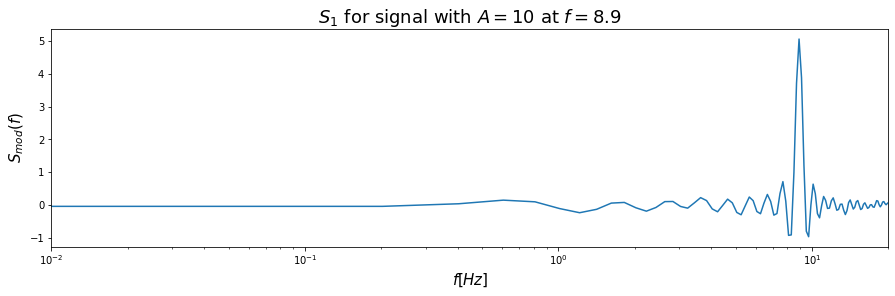

Frequency  f = 8.900Hz
Best TS at f = 8.889Hz
TS at right f = 0.404 (0.40404000)
Best TS   = 5.072 (5.07192000)
Mismatch: 0.00012343210000000882


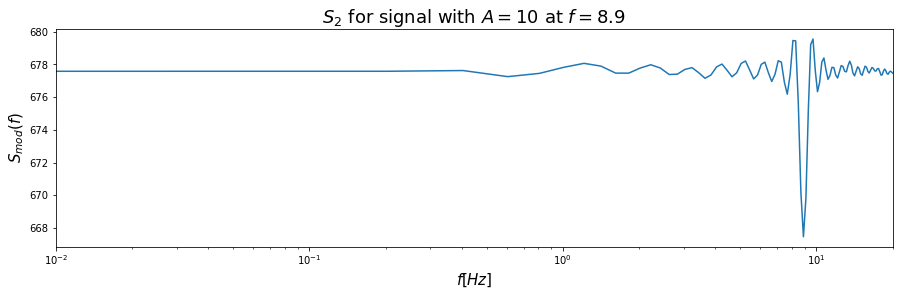

Frequency  f = 8.900Hz
Best TS at f = 8.889Hz
TS at right f = 0.000 (0.00000000)
Best TS   = 667.463 (667.46300000)
Mismatch: 0.00012343210000000882


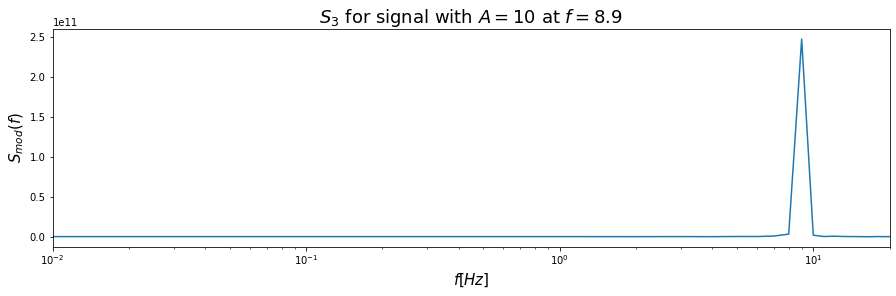

Frequency  f = 8.900Hz
Best TS at f = 9.000Hz
TS at right f = 246877000000.000 (246877000000.00000000)
Best TS   = 246877000000.000 (246877000000.00000000)
Mismatch: 0.009999999999999929
../code/generate_source -o ../code/data/data_task4_8.9_a3.txt -s 25 -d 1e-05 -N 100000 -f 8.9 -p 0 -a 3 -r 0
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------

Trail with A = 3


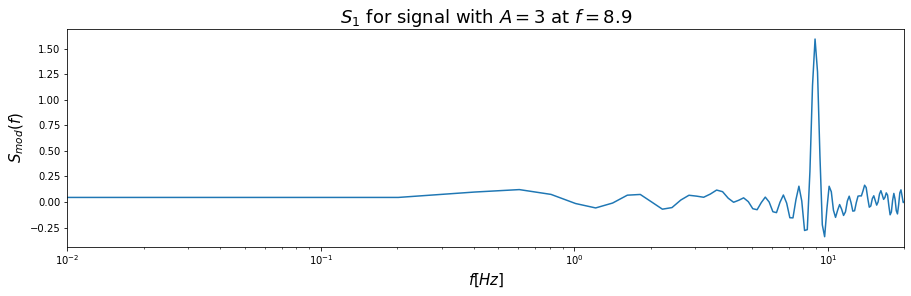

Frequency  f = 8.900Hz
Best TS at f = 8.889Hz
TS at right f = 0.404 (0.40404000)
Best TS   = 1.594 (1.59362000)
Mismatch: 0.00012343210000000882


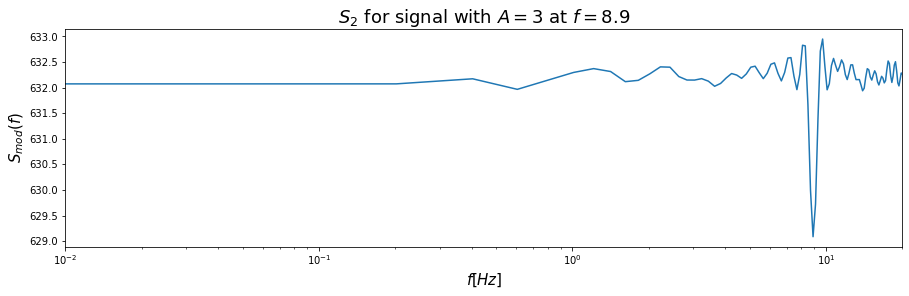

Frequency  f = 8.900Hz
Best TS at f = 8.889Hz
TS at right f = 0.000 (0.00000000)
Best TS   = 629.087 (629.08700000)
Mismatch: 0.00012343210000000882


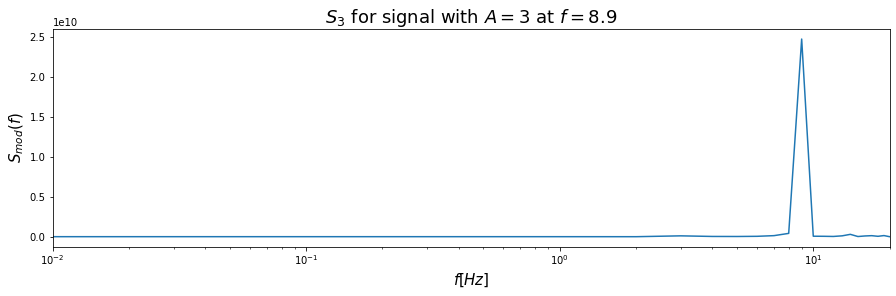

Frequency  f = 8.900Hz
Best TS at f = 9.000Hz
TS at right f = 24729000000.000 (24729000000.00000000)
Best TS   = 24729000000.000 (24729000000.00000000)
Mismatch: 0.009999999999999929
../code/generate_source -o ../code/data/data_task4_8.9_a0.15.txt -s 25 -d 1e-05 -N 100000 -f 8.9 -p 0 -a 0.15 -r 0
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------

Trail with A = 0.15


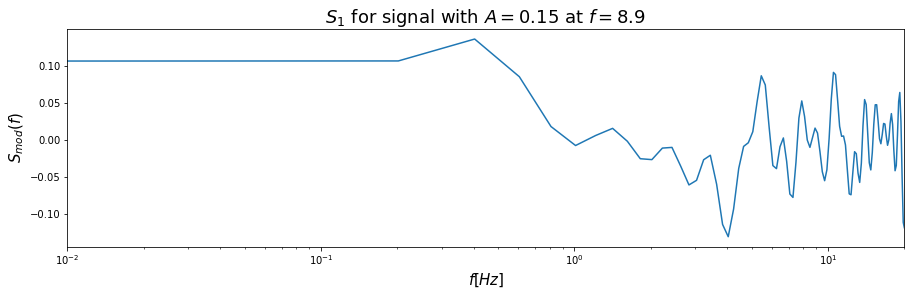

Frequency  f = 8.900Hz
Best TS at f = 0.404Hz
TS at right f = 0.404 (0.40404000)
Best TS   = 0.137 (0.13654000)
Mismatch: 72.1813363216


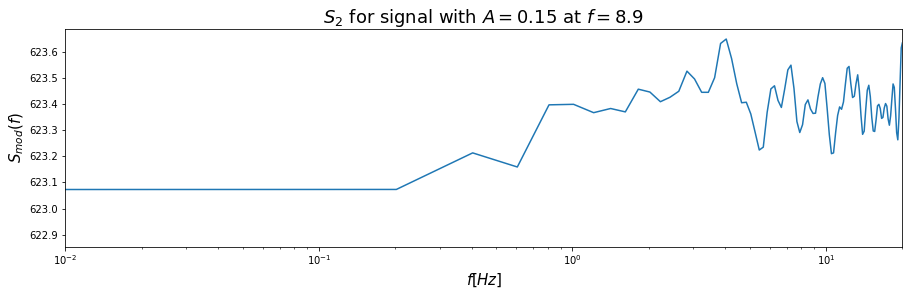

Frequency  f = 8.900Hz
Best TS at f = 0.000Hz
TS at right f = 0.000 (0.00000000)
Best TS   = 622.892 (622.89200000)
Mismatch: 79.21000000000001


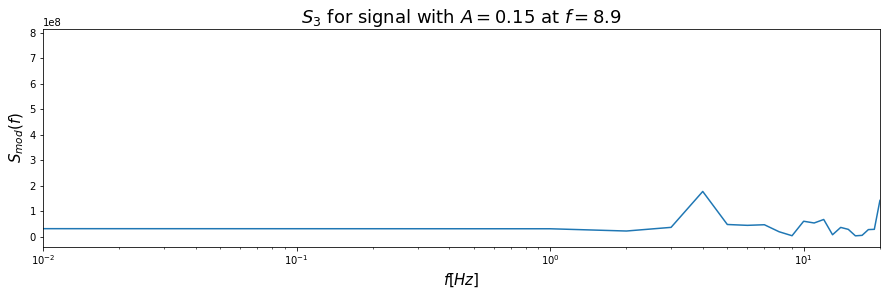

Frequency  f = 8.900Hz
Best TS at f = 17693.000Hz
TS at right f = 774538000.000 (774538000.00000000)
Best TS   = 774538000.000 (774538000.00000000)
Mismatch: 312727392.80999994


In [14]:
sig, N_df, freq, f_max = 25, 100, 8.9, 20

for amp in [15, 10, 3, 0.15]:
    input_file = f"data_task4_{freq}_a{amp}.txt"
    generate_source(input_file, sigma=sig, f=freq, A=amp) 
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')
    print('------------------------------------------------------------')

    print(f"\nTrail with A = {amp}")
    freq_1 = plot_freq_sol(input_file, N_df, f_max, mod=1,
                  title=f"$S_1$ for signal with $A = {amp}$ at $f={freq}$")
    print(f"Mismatch: {(freq_1 -freq)**2}")
    freq_2 = plot_freq_sol(input_file, N_df, f_max, mod=2,
                  title=f"$S_2$ for signal with $A = {amp}$ at $f={freq}$")
    print(f"Mismatch: {(freq_2 -freq)**2}")
    freq_3 = plot_freq_sol(input_file, N_df, f_max, mod=3,
                  title=f"$S_3$ for signal with $A = {amp}$ at $f={freq}$")
    print(f"Mismatch: {(freq_3 -freq)**2}")

# Task 5
Develop a strategy to find a signal using prober for a signal with unknown parameters $(A, f, \phi)$.